In [ ]:
# NFl Team Data Analysis

This Notebook analyzes NFL team data to uncover trends and insights about regular season team stats from 2003-2023 to see how offenses evolved.




In [3]:
import pandas as pd
import numpy as np

file_path = 'C:\\Users\\cjget\\Downloads\\team_stats_2003_2023.csv'

df = pd.read_csv('C:\\Users\\cjget\\Downloads\\team_stats_2003_2023.csv')

print(df.head())

   year                  team  wins  losses  win_loss_perc  points  \
0  2003  New England Patriots    14       2          0.875     348   
1  2003        Miami Dolphins    10       6          0.625     311   
2  2003         Buffalo Bills     6      10          0.375     243   
3  2003         New York Jets     6      10          0.375     283   
4  2003      Baltimore Ravens    10       6          0.625     391   

   points_opp  points_diff  mov   g  ...  rush_td  rush_yds_per_att  rush_fd  \
0         238          110  6.9  16  ...        9               3.4       91   
1         261           50  3.1  16  ...       14               3.7       99   
2         279          -36 -2.3  16  ...       13               3.9       96   
3         299          -16 -1.0  16  ...        8               4.0       78   
4         281          110  6.9  16  ...       18               4.8      115   

   penalties  penalties_yds  pen_fd  score_pct  turnover_pct  exp_pts_tot  \
0        111         

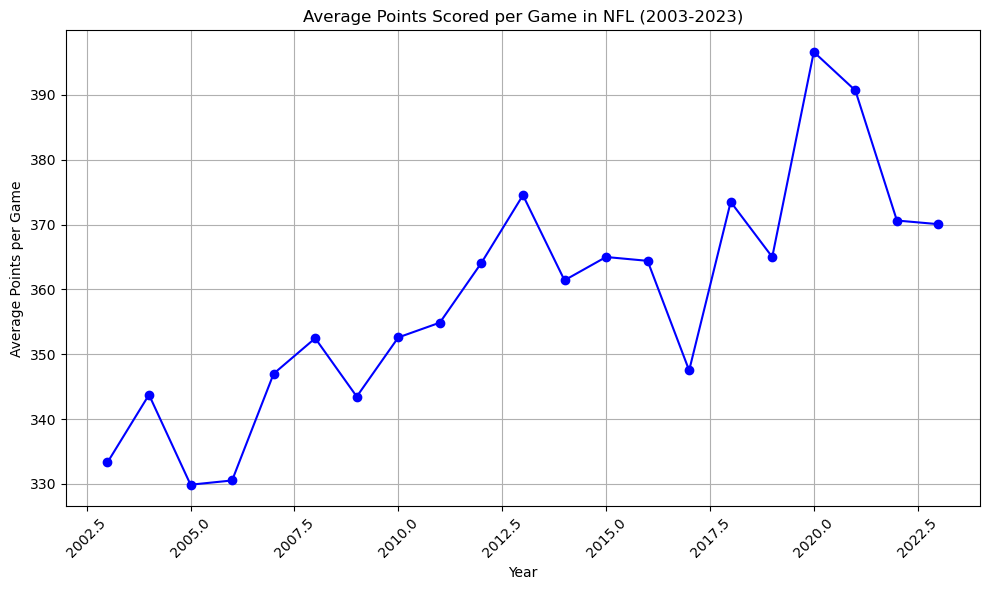

In [4]:
# Question 1: How has the average points scored per game changed over the years?


import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('C:\\Users\\cjget\\Downloads\\team_stats_2003_2023.csv')

average_points_per_year = df.groupby('year')['points'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_points_per_year['year'], average_points_per_year['points'], marker = 'o', linestyle='-', color='b')
plt.title('Average Points Scored per Game in NFL (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Average Points per Game')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In [5]:
# Question 2: How have the average yards gained per play on offense changed over the years?


average_yards_per_play_per_year = df.groupby('year')['yds_per_play_offense'].mean().reset_index()

print(average_yards_per_play_per_year)



    year  yds_per_play_offense
0   2003              5.068750
1   2004              5.231250
2   2005              5.034375
3   2006              5.150000
4   2007              5.178125
5   2008              5.281250
6   2009              5.331250
7   2010              5.321875
8   2011              5.434375
9   2012              5.400000
10  2013              5.340625
11  2014              5.431250
12  2015              5.478125
13  2016              5.481250
14  2017              5.268750
15  2018              5.590625
16  2019              5.478125
17  2020              5.581250
18  2021              5.418750
19  2022              5.396875
20  2023              5.253125


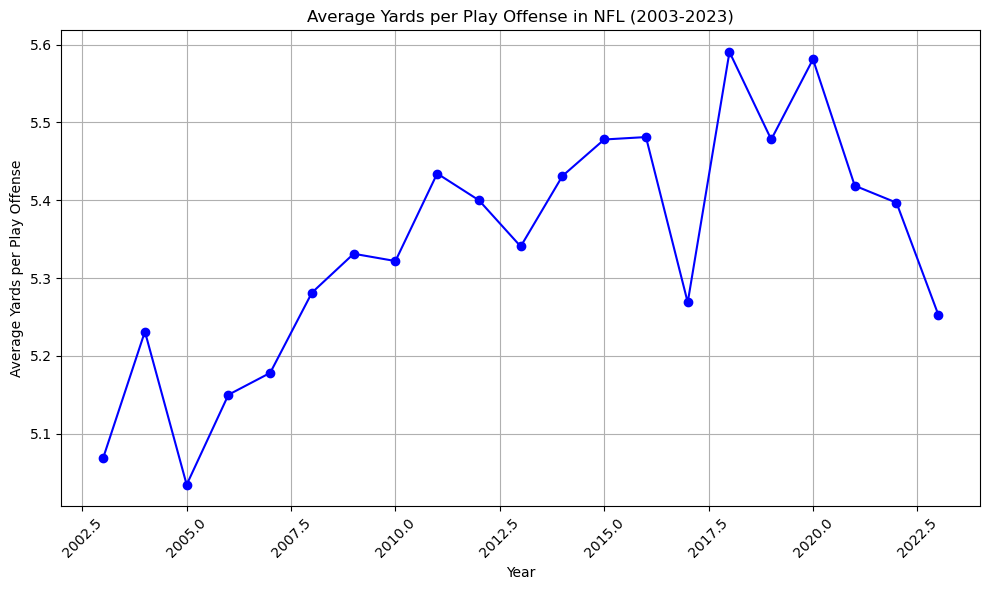

In [6]:
# Plotting the average yards per play offense over the years
plt.figure(figsize=(10, 6))
plt.plot(average_yards_per_play_per_year['year'], average_yards_per_play_per_year['yds_per_play_offense'], marker='o', linestyle='-', color='b')
plt.title('Average Yards per Play Offense in NFL (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Average Yards per Play Offense')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# Question 3: Which team had the most offensive yards each year?

highest_yards_per_play_per_year = df.loc[df.groupby('year')['yds_per_play_offense'].idxmax()]

# Display the resulting DataFrame
print("Teams with the highest offensive yards per play per season:")
print(highest_yards_per_play_per_year[['year', 'team', 'yds_per_play_offense']])


Teams with the highest offensive yards per play per season:
     year                  team  yds_per_play_offense
21   2003     Minnesota Vikings                   6.0
40   2004    Indianapolis Colts                   6.7
72   2005    Indianapolis Colts                   5.8
112  2006   Philadelphia Eagles                   6.2
128  2007  New England Patriots                   6.2
187  2008    New Orleans Saints                   6.3
208  2009        Dallas Cowboys                   6.3
237  2010    San Diego Chargers                   6.1
280  2011    New Orleans Saints                   6.7
304  2012   Washington Redskins                   6.2
332  2013        Denver Broncos                   6.3
356  2014   Pittsburgh Steelers                   6.2
389  2015   Pittsburgh Steelers                   6.3
440  2016       Atlanta Falcons                   6.7
472  2017    New Orleans Saints                   6.3
492  2018    Kansas City Chiefs                   6.8
529  2019        Dalla

The correlation between average points scored per game and win-loss percentage is: 0.7489783957207649


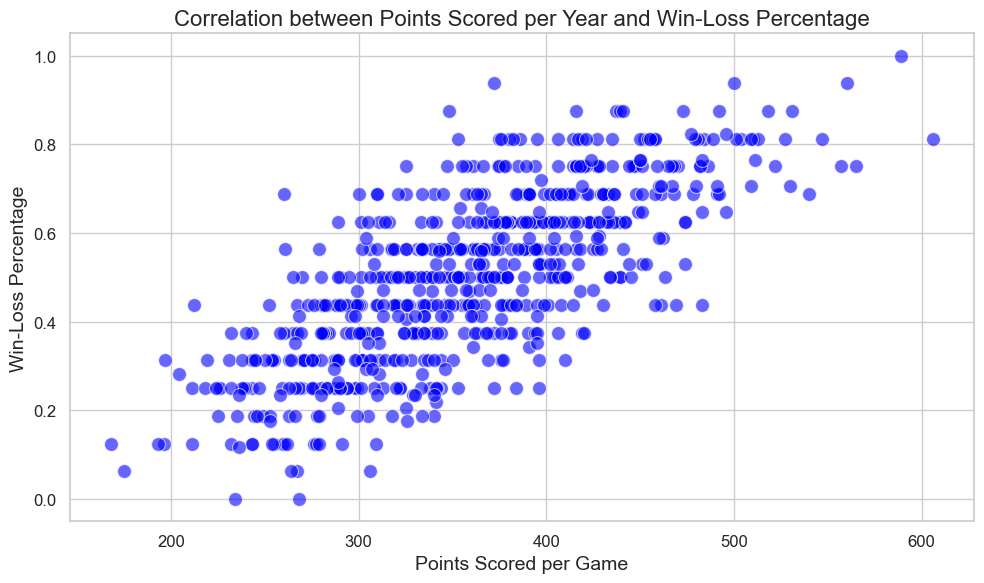

In [8]:
# Question 4: What is the correlation between average points scored per year and win-loss percentage?
import seaborn as sns


correlation = df['points'].corr(df['win_loss_perc'])

# Display the correlation coefficient
print(f"The correlation between average points scored per game and win-loss percentage is: {correlation}")

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Basic scatter plot with customizations for clarity
sns.scatterplot(x='points', y='win_loss_perc', data=df, s=100, color='blue', alpha=0.6)

# Customize the plot
plt.title('Correlation between Points Scored per Year and Win-Loss Percentage', fontsize=16)
plt.xlabel('Points Scored per Game', fontsize=14)
plt.ylabel('Win-Loss Percentage', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


The correlation between offensive plays and win-loss percentage is: 0.24


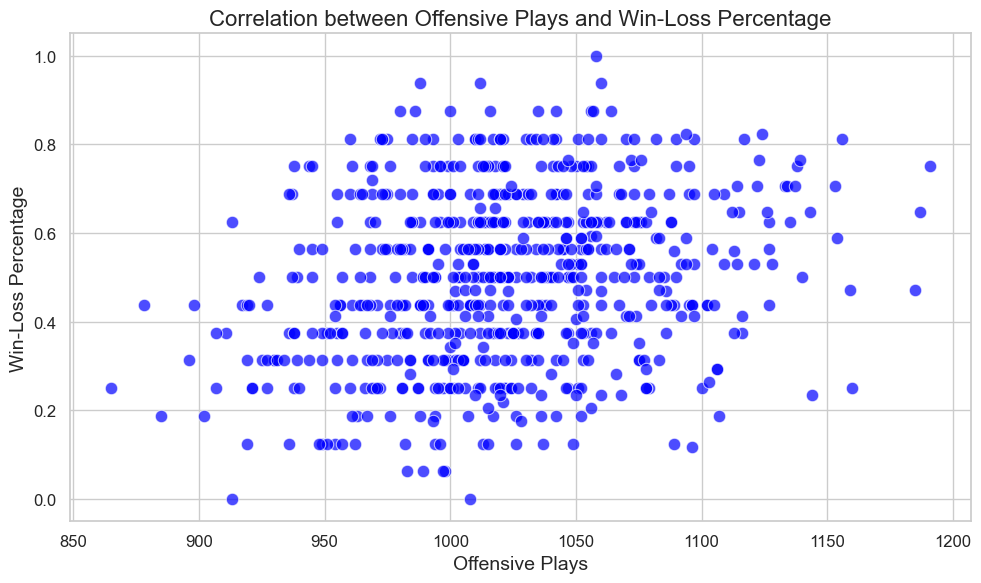

In [9]:
 # Question 5: How does the number of offensive plays correlate with the teams win percentage?

correlation = df['plays_offense'].corr(df['win_loss_perc'])

print(f"The correlation between offensive plays and win-loss percentage is: {correlation:.2f}")

plt.figure(figsize=(10, 6))

sns.scatterplot(x='plays_offense', y='win_loss_perc', data=df, s=80, color='blue', alpha=0.7)

# Customize the plot
plt.title('Correlation between Offensive Plays and Win-Loss Percentage', fontsize=16)
plt.xlabel('Offensive Plays', fontsize=14)
plt.ylabel('Win-Loss Percentage', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


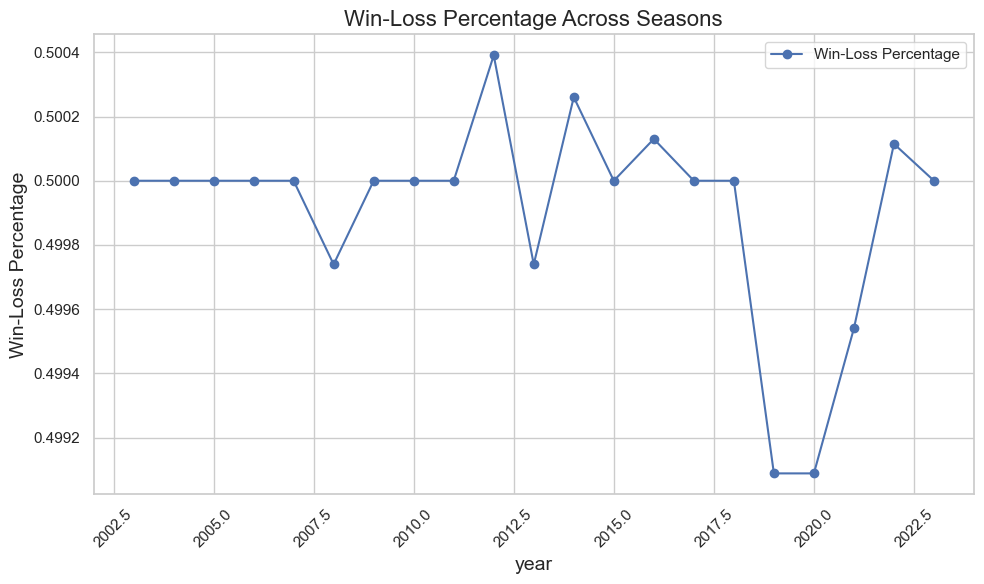

In [10]:
# Question 6: How does the win-loss ratio vary across different seasons?

df['win_loss_perc'] = df['wins'] / (df['wins'] + df['losses'])

# Group by season and calculate average win-loss percentage
season_avg = df.groupby('year')['win_loss_perc'].mean().reset_index()


# Create a line plot to visualize win-loss ratio across seasons
plt.figure(figsize=(10, 6))
plt.plot(season_avg['year'], season_avg['win_loss_perc'], marker='o', linestyle='-', color='b', label='Win-Loss Percentage')

# Customize the plot
plt.title('Win-Loss Percentage Across Seasons', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('Win-Loss Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

                   team  win_loss_perc
0  New England Patriots          0.875
1        Miami Dolphins          0.625
2         Buffalo Bills          0.375
3         New York Jets          0.375
4      Baltimore Ravens          0.625
The correlation between penalties and win-loss percentage is: -0.11


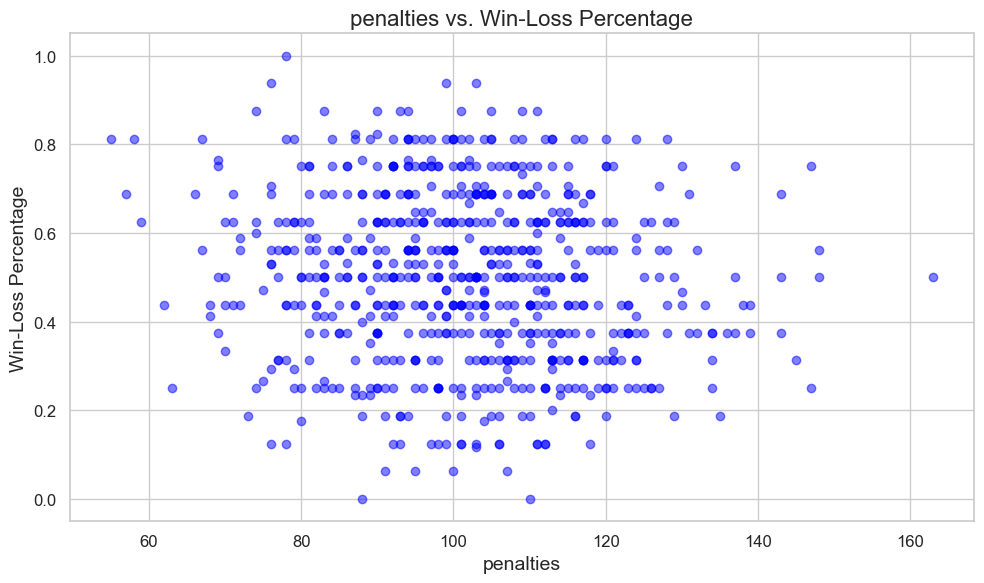

In [13]:
# Question 7: Do teams with higher penalties tend to have lower win percentages compared to teams with fewer penalties?

df['win_loss_perc'] = df['wins'] / (df['wins'] + df['losses'])

print(df[['team', 'win_loss_perc']].head())


# Calculate correlation between penalties and win-loss percentage
correlation = df['penalties'].corr(df['win_loss_perc'])

print(f"The correlation between penalties and win-loss percentage is: {correlation:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['penalties'], df['win_loss_perc'], color='blue', alpha=0.5)

plt.title('penalties vs. Win-Loss Percentage', fontsize=16)
plt.xlabel('penalties', fontsize=14)
plt.ylabel('Win-Loss Percentage', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()



                   team  win_loss_perc
0  New England Patriots          0.875
1        Miami Dolphins          0.625
2         Buffalo Bills          0.375
3         New York Jets          0.375
4      Baltimore Ravens          0.625
The correlation between fumbles lost and win-loss percentage is: -0.30


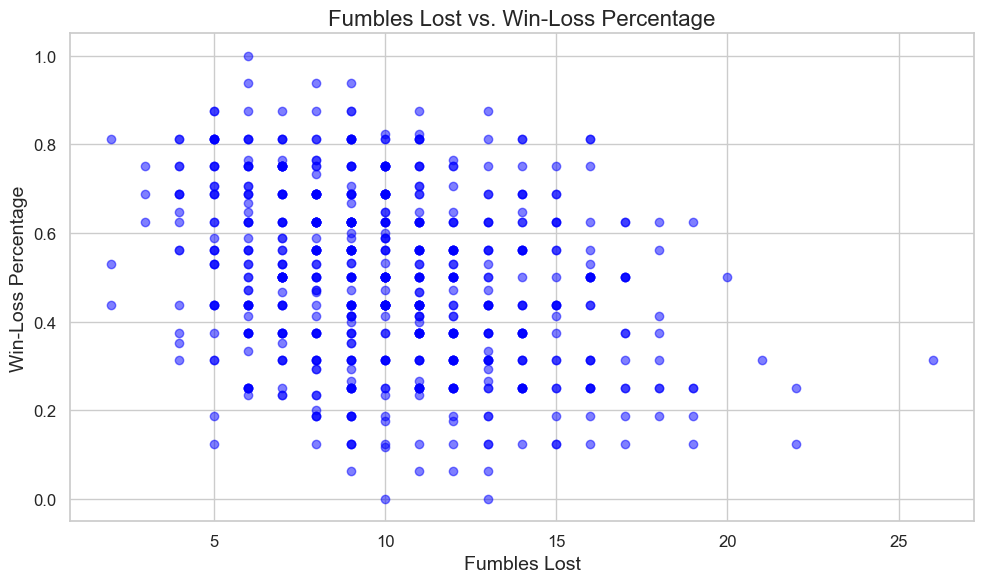

In [14]:
# Question 8: How does the frequency of fumbles lost correlate with a team's win-loss record?

df['win_loss_perc'] = df['wins'] / (df['wins'] + df['losses'])

# Display the calculated win-loss percentage
print(df[['team', 'win_loss_perc']].head())

correlation = df['fumbles_lost'].corr(df['win_loss_perc'])

print(f"The correlation between fumbles lost and win-loss percentage is: {correlation:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['fumbles_lost'], df['win_loss_perc'], color='blue', alpha=0.5)

plt.title('Fumbles Lost vs. Win-Loss Percentage', fontsize=16)
plt.xlabel('Fumbles Lost', fontsize=14)
plt.ylabel('Win-Loss Percentage', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()



In [20]:
# Question 9: What team won the most from 2003-2023?

# Group by team and sum the wins
team_wins = df.groupby('team')['wins'].sum().reset_index()

# Find the team with the most wins
most_wins_team = team_wins.loc[team_wins['wins'].idxmax()]

print(f"The team with the most wins from 2003 to 2023 is {most_wins_team['team']} with {most_wins_team['wins']} wins.")



The team with the most wins from 2003 to 2023 is New England Patriots with 241 wins.


In [21]:
# Question 10: How does the New england patriots streak of 21 winning seasons compare to other NFL teams the past 21 seasons?

df_filtered = df[(df['year'] >= 2003) & (df['year'] <= 2023)]

print(df_filtered.head())

winning_seasons = df_filtered[df_filtered['wins'] > df_filtered['losses']].groupby('team')['year'].count().reset_index()
winning_seasons.columns = ['team', 'wins']

winning_seasons_sorted = winning_seasons.sort_values(by='wins', ascending=False)

print("Top Teams by Number of Winning Seasons (2003-2023):")
print(winning_seasons_sorted.head(10))  # Adjust number as needed

# Identify the number of winning seasons for the New England Patriots
patriots_winning_seasons = winning_seasons.loc[winning_seasons['team'] == 'New England Patriots', 'wins'].values[0]

comparison_message = f"The New England Patriots had {patriots_winning_seasons} winning seasons from 2003 to 2023."

print(comparison_message)

   year                  team  wins  losses  win_loss_perc  points  \
0  2003  New England Patriots    14       2          0.875     348   
1  2003        Miami Dolphins    10       6          0.625     311   
2  2003         Buffalo Bills     6      10          0.375     243   
3  2003         New York Jets     6      10          0.375     283   
4  2003      Baltimore Ravens    10       6          0.625     391   

   points_opp  points_diff  mov   g  ...  rush_td  rush_yds_per_att  rush_fd  \
0         238          110  6.9  16  ...        9               3.4       91   
1         261           50  3.1  16  ...       14               3.7       99   
2         279          -36 -2.3  16  ...       13               3.9       96   
3         299          -16 -1.0  16  ...        8               4.0       78   
4         281          110  6.9  16  ...       18               4.8      115   

   penalties  penalties_yds  pen_fd  score_pct  turnover_pct  exp_pts_tot  \
0        111         